In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import time

In [3]:
category_tree = pd.read_csv('/content/drive/My Drive/recommender_system/archive/category_tree.csv')
events = pd.read_csv('/content/drive/My Drive/recommender_system/archive/events.csv')
item_properties_part1 = pd.read_csv('/content/drive/My Drive/recommender_system/archive/item_properties_part1.csv')
item_properties_part2 = pd.read_csv('/content/drive/My Drive/recommender_system/archive/item_properties_part2.csv')

In [11]:
item_properties_part1[(item_properties_part1.itemid == 150318)].sort_values('timestamp')

,timestamp,itemid,property,value
7542375,1431226800000,150318,112,679677
4158852,1431226800000,150318,159,519769
7871075,1432436400000,150318,698,1189968
5909456,1432436400000,150318,839,286312
9068828,1432436400000,150318,941,1322342 1189968
737842,1432436400000,150318,790,n54120.000
936625,1433041200000,150318,790,n54120.000
9461031,1433041200000,150318,202,1265514 1224110 734600
730641,1433041200000,150318,categoryid,1236
3709754,1435460400000,150318,928,629205


In [ ]:
v_id_102019 = events[events.visitorid == 102019].sort_values('timestamp')

In [ ]:
v_id_102019

,timestamp,visitorid,event,itemid,transactionid
19690,1433175714335,102019,view,49521,NaN
19501,1433175801314,102019,addtocart,49521,NaN
14842,1433175812596,102019,view,150318,NaN
19573,1433175871497,102019,view,49521,NaN
8701,1433175894837,102019,view,49521,NaN
19708,1433175945872,102019,view,150318,NaN
8740,1433176042269,102019,view,49521,NaN
814,1433176736375,102019,transaction,150318,13556.0
19724,1433176736422,102019,transaction,49521,13556.0


In [ ]:
# itemid_49521 = item_properties_part2[item_properties_part2.itemid == 49521].sort_values('timestamp')
# itemid_49521 = itemid_49521.reset_index()
# itemid_49521 = itemid_49521.drop('index', axis=1)
# itemid_49521

In [ ]:
new_df = pd.DataFrame()

In [ ]:
for j in range(len(v_id_102019)):
  itemid = item_properties_part1[item_properties_part1.itemid == v_id_102019.iloc[j,3]].sort_values('timestamp')
  d1 = v_id_102019.iloc[j,0]
  converted_d1 = datetime.datetime.fromtimestamp(round(d1 / 1000))
  diff = datetime.timedelta(days=1000)
  index = 0
  for i in range(len(itemid)):
    d2 = itemid.iloc[i,0]
    converted_d2 = datetime.datetime.fromtimestamp(round(d2 / 1000))
    if (converted_d1 >= converted_d2) and ((converted_d1 - converted_d2)<=diff):
      diff = converted_d1 - converted_d2
      index = i
  new_df = new_df.append(itemid[itemid['timestamp'] == itemid.iloc[index,0]])

In [ ]:
for j in range(len(v_id_102019)):
  itemid = item_properties_part2[item_properties_part2.itemid == v_id_102019.iloc[j,3]].sort_values('timestamp')
  d1 = v_id_102019.iloc[j,0]
  converted_d1 = datetime.datetime.fromtimestamp(round(d1 / 1000))
  diff = datetime.timedelta(days=1000)
  index = 0
  for i in range(len(itemid)):
    d2 = itemid.iloc[i,0]
    converted_d2 = datetime.datetime.fromtimestamp(round(d2 / 1000))
    if (converted_d1 >= converted_d2) and ((converted_d1 - converted_d2)<=diff):
      diff = converted_d1 - converted_d2
      index = i
  new_df = new_df.append(itemid[itemid['timestamp'] == itemid.iloc[index,0]])

In [ ]:
new_df = new_df.drop_duplicates()
new_df

,timestamp,itemid,property,value
1283131,1433041200000,49521,1058,n48.000
7099791,1433041200000,49521,839,286312
7438840,1433041200000,49521,202,222207
8058031,1433041200000,49521,463,n108.000
10750085,1433041200000,49521,available,1
936625,1433041200000,150318,790,n54120.000
9461031,1433041200000,150318,202,1265514 1224110 734600
730641,1433041200000,150318,categoryid,1236
7302564,1433041200000,49521,364,490489
4861168,1433041200000,49521,792,1116693


In [ ]:
tx = 1433175801314/1000
new_time_x = datetime.datetime.fromtimestamp(tx)
x = new_time_x.strftime('%Y-%m-%d %H:%M:%S%f')

In [ ]:
ty = 1433041200000/1000
new_time_y = datetime.datetime.fromtimestamp(ty)
y = new_time_y.strftime('%Y-%m-%d %H:%M:%S%f')

In [ ]:
print(x, y)

2015-06-01 16:23:21314000 2015-05-31 03:00:00000000


In [ ]:
x >= y

True

In [ ]:
from __future__ import division

d1 = 1433175871497
d2 = 1431226800000

converted_d1 = datetime.datetime.fromtimestamp(round(d1 / 1000))
converted_d2 = datetime.datetime.fromtimestamp(round(d2 / 1000))

print((converted_d1 - converted_d2))
print((converted_d1 - converted_d2).total_seconds() / 60)

22 days, 13:24:31
32484.516666666666


In [ ]:
if (converted_d1 - converted_d2)<= datetime.timedelta(days=20):
  print('hi')

In [ ]:
(converted_d1 - converted_d2)

datetime.timedelta(days=22, seconds=48271)

# New Visitor ID

In [ ]:
v_id_824915 = events[events.visitorid == 824915].sort_values('timestamp')

In [ ]:
v_id_824915

,timestamp,visitorid,event,itemid,transactionid
15710,1433220801308,824915,view,354365,NaN
473,1433220855897,824915,view,292760,NaN
4454,1433220865962,824915,view,371727,NaN
8,1433220899221,824915,view,428805,NaN
115,1433220908194,824915,view,25427,NaN


In [ ]:
new_df_824915 = pd.DataFrame()

In [ ]:
for j in range(len(v_id_824915)):
  itemid = item_properties_part1[item_properties_part1.itemid == v_id_824915.iloc[j,3]].sort_values('timestamp')
  d1 = v_id_824915.iloc[j,0]
  converted_d1 = datetime.datetime.fromtimestamp(round(d1 / 1000))
  diff = datetime.timedelta(days=1000)
  index = 0
  for i in range(len(itemid)):
    d2 = itemid.iloc[i,0]
    converted_d2 = datetime.datetime.fromtimestamp(round(d2 / 1000))
    if (converted_d1 >= converted_d2) and ((converted_d1 - converted_d2)<=diff):
      diff = converted_d1 - converted_d2
      index = i
  new_df_824915 = new_df_824915.append(itemid[itemid['timestamp'] == itemid.iloc[index,0]])

for j in range(len(v_id_824915)):
  itemid = item_properties_part2[item_properties_part2.itemid == v_id_824915.iloc[j,3]].sort_values('timestamp')
  d1 = v_id_824915.iloc[j,0]
  converted_d1 = datetime.datetime.fromtimestamp(round(d1 / 1000))
  diff = datetime.timedelta(days=1000)
  index = 0
  for i in range(len(itemid)):
    d2 = itemid.iloc[i,0]
    converted_d2 = datetime.datetime.fromtimestamp(round(d2 / 1000))
    if (converted_d1 >= converted_d2) and ((converted_d1 - converted_d2)<=diff):
      diff = converted_d1 - converted_d2
      index = i
  new_df_824915 = new_df_824915.append(itemid[itemid['timestamp'] == itemid.iloc[index,0]])

In [ ]:
new_df_824915 = new_df_824915.drop_duplicates()
new_df_824915

,timestamp,itemid,property,value
6360361,1433041200000,354365,638,n12.000
6759894,1433041200000,354365,790,n128160.000
7463644,1433041200000,354365,636,162622 1033990
10641659,1433041200000,292760,506,961511 1284577 230420
9002262,1433041200000,292760,202,1275486
4241378,1433041200000,292760,955,988697 581051
7982276,1433041200000,292760,1092,291010
8198958,1433041200000,292760,790,n220440.000
2266150,1433041200000,371727,636,162622 1033990
2481012,1433041200000,371727,955,988697 581051


# Item properties exploration for Visitor ID

In [ ]:
item_properties_part1[item_properties_part1.timestamp == 1433041200000]

,timestamp,itemid,property,value
76,1433041200000,292458,451,1141052 n48.000
101,1433041200000,411262,available,0
102,1433041200000,298275,438,1322464
169,1433041200000,276631,888,787933 n72492.000 549428
176,1433041200000,78556,888,526492
...,...,...,...,...
10999965,1433041200000,41260,689,150169 108779
10999966,1433041200000,15493,810,1175087 348133
10999980,1433041200000,251050,441,n288.000
10999989,1433041200000,56123,348,452320 853231


In [ ]:
events[events['event'] == 'transaction']

,timestamp,visitorid,event,itemid,transactionid
130,1433222276276,599528,transaction,356475,4000.0
304,1433193500981,121688,transaction,15335,11117.0
418,1433193915008,552148,transaction,81345,5444.0
814,1433176736375,102019,transaction,150318,13556.0
843,1433174518180,189384,transaction,310791,7244.0
...,...,...,...,...,...
2755294,1438377176570,1050575,transaction,31640,8354.0
2755349,1438379878779,861299,transaction,456602,3643.0
2755508,1438357730123,855941,transaction,235771,4385.0
2755603,1438355560300,548772,transaction,29167,13872.0


In [ ]:
events[events['visitorid']==1051054].sort_values('timestamp')

,timestamp,visitorid,event,itemid,transactionid
2755593,1438358847786,1051054,view,312728,NaN
2739839,1438358858548,1051054,addtocart,312728,NaN
2755607,1438358989163,1051054,transaction,312728,17579.0
2755578,1438359194127,1051054,addtocart,463002,NaN
2739787,1438359416397,1051054,transaction,463002,11404.0


In [ ]:
x = events[events['visitorid']==548772].sort_values('timestamp') #transaction = 60, addtocart = 61, view = 691

In [ ]:
x

,timestamp,visitorid,event,itemid,transactionid
367022,1434666815694,548772,view,308102,NaN
371851,1434666817639,548772,view,93315,NaN
353043,1434666824702,548772,view,224959,NaN
354951,1434666912670,548772,view,339703,NaN
360636,1434667723198,548772,view,397642,NaN
...,...,...,...,...,...
2753759,1438372905123,548772,view,144535,NaN
2739448,1438373046800,548772,view,271324,NaN
2750591,1438373685393,548772,view,351313,NaN
2744303,1438375118346,548772,view,228314,NaN


# VisitorID event histogram

In [ ]:
events.shape

(2756101, 5)

In [ ]:
events['visitorid'].unique().shape

(1407580,)

In [ ]:
count_vid = pd.DataFrame(events['visitorid'].value_counts())

In [ ]:
count_vid = count_vid.reset_index()
count_vid = count_vid.drop('index',axis=1)

In [ ]:
count_vid = count_vid.drop(np.arange(0,500,1),axis=0)

In [ ]:
count_vid = count_vid.reset_index()
count_vid = count_vid.drop('index',axis=1)

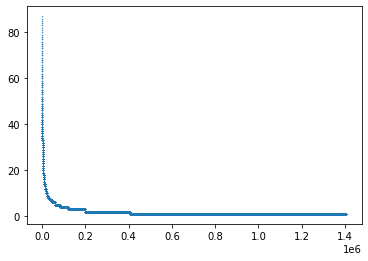

In [ ]:
plt.scatter(x=count_vid.index,y=count_vid['visitorid'],s=0.01)

In [ ]:
np.arange(1,100,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])